In [1]:
from keras.datasets import cifar10
import numpy as np

In [2]:
(train_data, train_labels), (test_data, test_labels)  = cifar10.load_data()

print("Original shapes: ")
print(f"train_data shape: {train_data.shape},\ntrain_labels shape: {train_labels.shape}")
print(f"test_data shape: {test_data.shape},\ntest_labels shape: {test_labels.shape}")

Original shapes: 
train_data shape: (50000, 32, 32, 3),
train_labels shape: (50000, 1)
test_data shape: (10000, 32, 32, 3),
test_labels shape: (10000, 1)


(-0.5, 31.5, 31.5, -0.5)

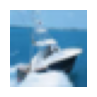

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(1, 1))
plt.imshow(train_data[8])
plt.axis('off')

In [4]:
train_data = (train_data / 255).astype('float32')
test_data = (test_data / 255).astype('float32')

In [5]:
from keras.utils import to_categorical
classes = np.unique(train_labels)
n_classes = len(classes)
print(f"classes: {classes}, number of classes: {n_classes}")
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_labels.shape

classes: [0 1 2 3 4 5 6 7 8 9], number of classes: 10


(50000, 10)

In [6]:
train_labels[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [32]:
from keras.layers import Conv2D, MaxPooling2D, Dropout, AveragePooling2D,BatchNormalization,Dense, Flatten
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(BatchNormalization(center=True, scale=True))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3, 3)))
model.add(BatchNormalization(center=True, scale=True))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=n_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_data, train_labels, epochs=20, batch_size=256, validation_data=(test_data, test_labels))

c:\Pipeline_development\python312_venv_ml\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
 35/196 ━━━━━━━━━━━━━━━━━━━━ 17s 111ms/step - accuracy: 0.2609 - loss: 2.0333

KeyboardInterrupt: 

Text(0.5, 1.0, 'Accuracy Curves')

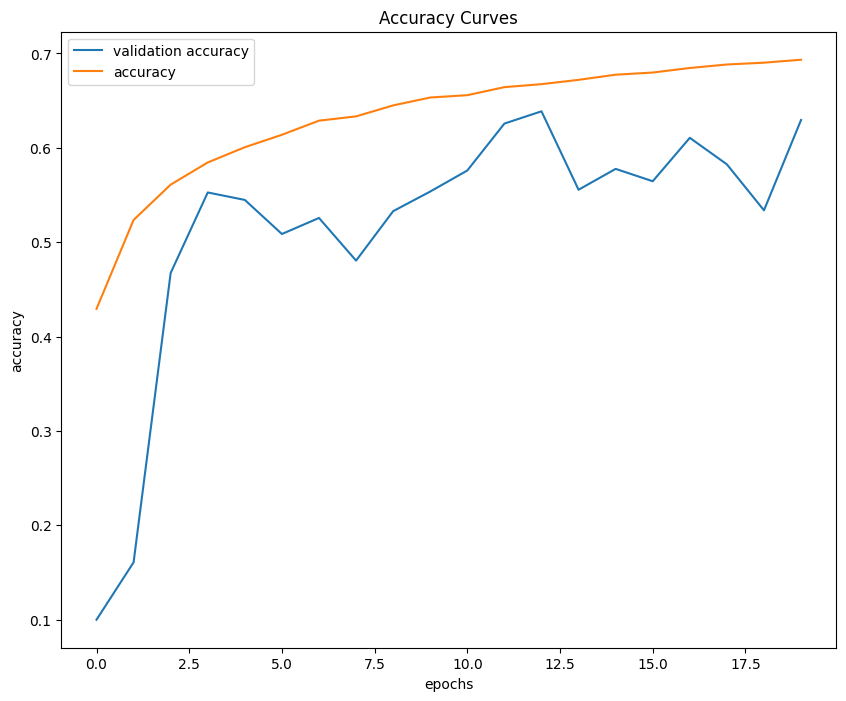

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.plot(history.history["val_accuracy"])
plt.plot(history.history["accuracy"])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(["validation accuracy", "training accuracy"])
plt.title("Accuracy Curves")

Text(0.5, 1.0, 'Loss Curves')

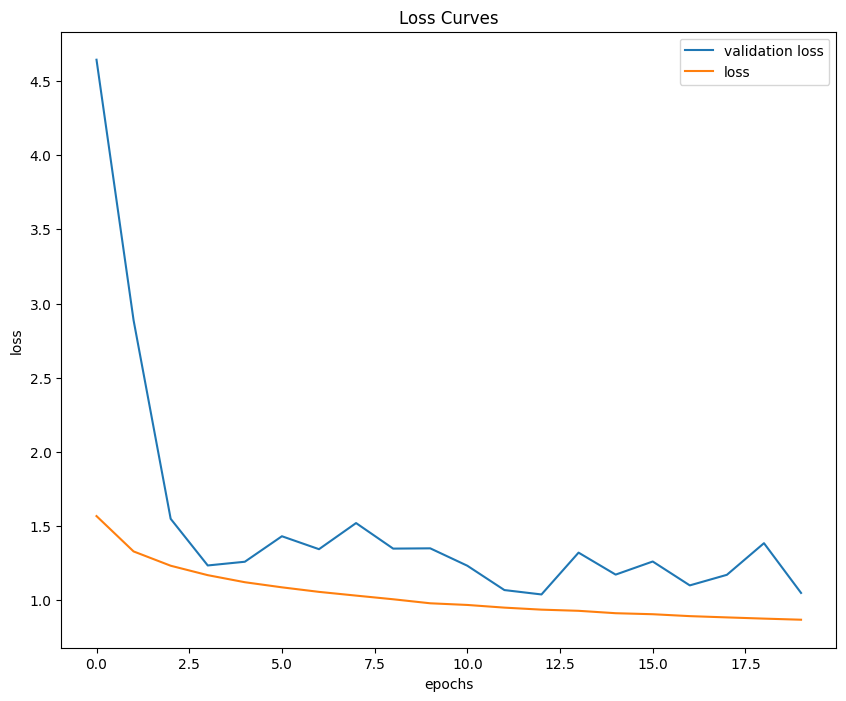

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.plot(history.history["val_loss"])
plt.plot(history.history["loss"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["validation loss", "training loss"])
plt.title("Loss Curves")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


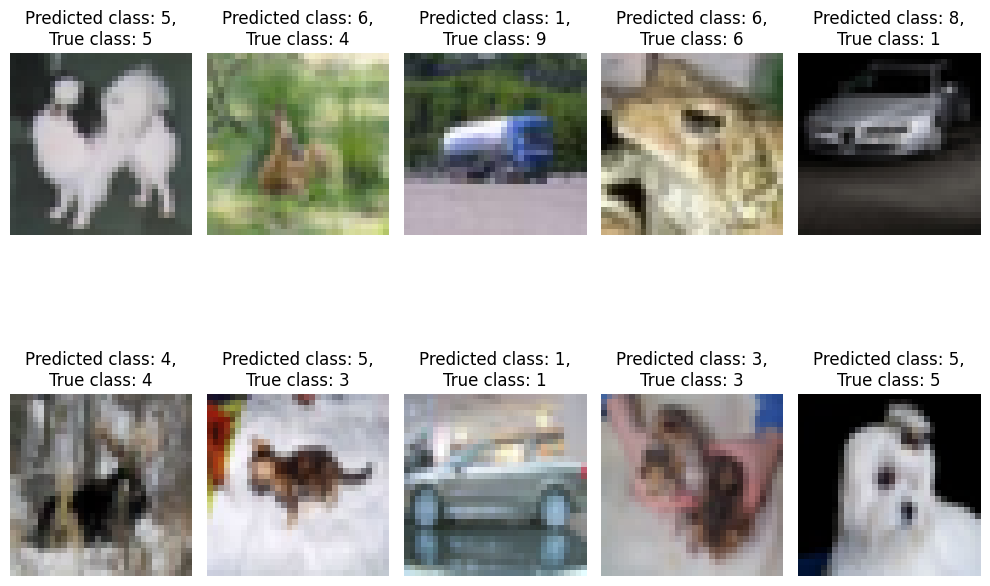

In [27]:
plt.figure(figsize=(10, 8))
for i in range(10):
    random_index = np.random.randint(test_data.shape[0])
    prediction_probabilities = model.predict(test_data[[random_index]])
    predicted_class = np.argmax(prediction_probabilities)
    true_class = np.argmax(test_labels[random_index])
    plt.subplot(2, 5, i + 1)
    plt.title(f"Predicted class: {predicted_class},\nTrue class: {true_class}")
    plt.axis("off")
    plt.imshow(test_data[random_index], cmap="gray")
plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
              precision    recall  f1-score   support

     Class 0       0.66      0.67      0.67      1000
     Class 1       0.78      0.79      0.78      1000
     Class 2       0.39      0.65      0.49      1000
     Class 3       0.50      0.38      0.43      1000
     Class 4       0.53      0.63      0.58      1000
     Class 5       0.72      0.31      0.43      1000
     Class 6       0.70      0.76      0.73      1000
     Class 7       0.70      0.68      0.69      1000
     Class 8       0.69      0.80      0.74      1000
     Class 9       0.85      0.64      0.73      1000

    accuracy                           0.63     10000
   macro avg       0.65      0.63      0.63     10000
weighted avg       0.65      0.63      0.63     10000

[[669  25 119  11  17   2  14  10 120  13]
 [ 54 785  27   6  13   5  15   8  44  43]
 [ 59   4 645  53 101  26  54  33  15  10]
 [ 19  13 227 380 127  45 101  42  40   6]
 [ 33   4 148  28 634   4  5

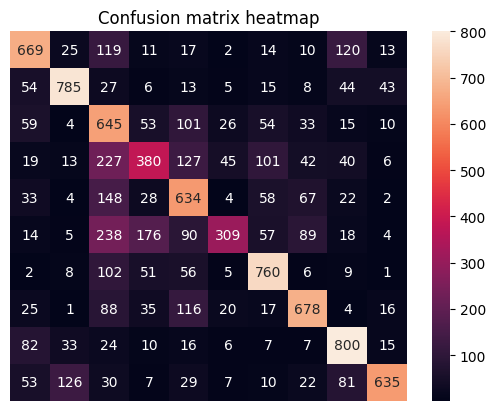

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

prediction_probabilities = model.predict(test_data)
predicted_labels = np.argmax(prediction_probabilities, axis=1)
test_labels_index = np.argmax(test_labels, axis=1)
print(classification_report(test_labels_index, predicted_labels, target_names=[f"Class {str(i)}" for i in range(10)]))

print(confusion_matrix(test_labels_index, predicted_labels))

import seaborn as sns

plt.figure()
plt.title("Confusion matrix heatmap")
sns.heatmap(confusion_matrix(test_labels_index, predicted_labels), annot=True, fmt='d') # , cmap='Blues' as args for differemt heatmap style
plt.axis("off")
plt.show()

In [29]:
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print(f"Model Loss on test data: {test_loss * 100:.2f}%\nModel Accuracy on test data: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6293 - loss: 1.0442
Model Loss on test data: 105.01%
Model Accuracy on test data: 62.95%


<strong style="color: green;">FROM CHATGPT:</strong>

### Understanding the Classification Report and Confusion Matrix

#### 1. Classification Report
The classification report provides key metrics for evaluating the performance of a classification model. It includes precision, recall, and F1-score for each class, along with the support (number of true instances for each class).

**Key Metrics:**
- **Precision:** The ratio of true positive predictions to the total number of positive predictions. High precision means that the model doesn't often label negative samples as positive.
- **Recall:** The ratio of true positive predictions to the total number of actual positive instances. High recall means that the model identifies most of the positive instances correctly.
- **F1-Score:** The harmonic mean of precision and recall. It provides a balanced measure of precision and recall, particularly useful when you need to find an optimal balance between them.
- **Support:** The number of actual occurrences of the class in the dataset.

**Interpreting the Report:**

- **Class-wise Metrics:**
  - For example, class '1':
    - **Precision = 1.00:** Almost all instances predicted as '1' were actually '1'.
    - **Recall = 0.99:** The model correctly identified 99% of all actual '1' digits.
    - **F1-Score = 1.00:** A high F1-score indicates a good balance between precision and recall.
    - **Support = 1135:** There are 1135 instances of the digit '1' in the test set.

- **Overall Metrics:**
  - **Accuracy = 0.99:** The model correctly predicted 99% of all test cases.
  - **Macro Avg:** Average metrics computed by treating all classes equally.
  - **Weighted Avg:** Average metrics weighted by the number of true instances for each class.

#### 2. Confusion Matrix
The confusion matrix provides a detailed breakdown of how the model's predictions compare to the actual labels for each class.

**Structure:**
- **Rows:** Represent the actual classes (true labels).
- **Columns:** Represent the predicted classes.

**Interpreting the Matrix:**
- **Diagonal Values:** These represent the number of correct predictions for each class.
- **Off-Diagonal Values:** These represent the number of misclassifications.

**Insights from the Confusion Matrix:**
- The model mostly predicts the correct digit (as shown by the high values along the diagonal).
- Misclassifications are minimal and spread across different classes, indicating that the model is generally robust across all digits.
- Specific misclassification patterns can help identify where the model might struggle (e.g., distinguishing between similar-looking digits like '9' and '4').

**Summary:** The model performs exceptionally well on the MNIST digits recognition task. The few errors it makes could be due to digits that look very similar to each other.
